# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

### Reading Dataset

In [2]:
df=pd.read_csv("C:\\Users\\amrendra\\Downloads\\car_prediction_data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.shape

(301, 9)

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
label_encode=LabelEncoder()

In [21]:
label=label_encode.fit_transform(df.Car_Name)
df["Car_Name"]=label
label1=label_encode.fit_transform(df.Seller_Type)
df["Seller_Type"]=label1
label4=label_encode.fit_transform(df.Transmission)
df["Transmission"]=label4
label8=label_encode.fit_transform(df.Fuel_Type)
df["Fuel_Type"]=label8

In [22]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,59,5.59,27000,2,0,1,0
1,93,2013,78,9.54,43000,1,0,1,0
2,68,2017,112,9.85,6900,2,0,1,0
3,96,2011,52,4.15,5200,2,0,1,0
4,92,2014,76,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,129,11.60,33988,1,0,1,0
297,66,2015,70,5.90,60000,2,0,1,0
298,69,2009,59,11.00,87934,2,0,1,0
299,69,2017,137,12.50,9000,1,0,1,0


In [23]:
x=df.drop(["Selling_Price"],axis=1)

In [24]:
x

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,2016,11.60,33988,1,0,1,0
297,66,2015,5.90,60000,2,0,1,0
298,69,2009,11.00,87934,2,0,1,0
299,69,2017,12.50,9000,1,0,1,0


In [25]:
y=df["Selling_Price"]

In [26]:
y

0       59
1       78
2      112
3       52
4       76
      ... 
296    129
297     70
298     59
299    137
300     88
Name: Selling_Price, Length: 301, dtype: int64

In [ ]:
### Training and Testing Dataset

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
model=LinearRegression()

In [29]:
model.fit(x_train,y_train)

LinearRegression()

In [30]:
predict=model.predict(x_train)

In [31]:
r2_train=metrics.r2_score(y_train,predict)

In [32]:
r2_train

0.8376761908267507

In [33]:
predict1=model.predict(x_test)

In [34]:
r2_test=metrics.r2_score(y_test,predict1)

In [35]:
r2_test

0.91138809848277

<function matplotlib.pyplot.show(close=None, block=None)>

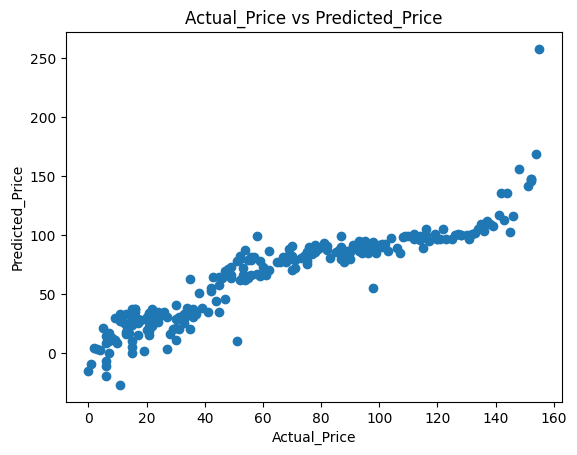

In [36]:
plt.scatter(y_train,predict)
plt.xlabel('Actual_Price')
plt.ylabel("Predicted_Price")
plt.title('Actual_Price vs Predicted_Price')
plt.show

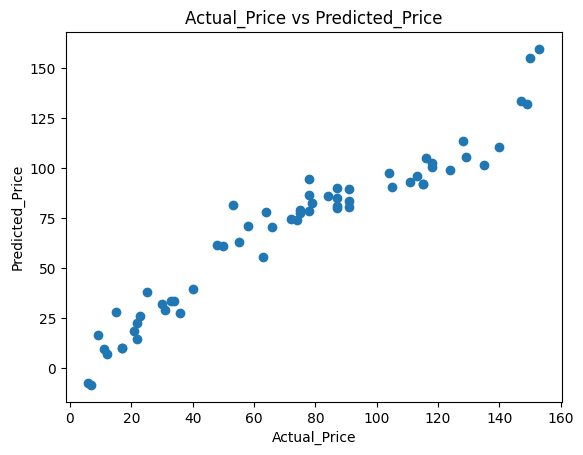

In [37]:
plt.scatter(y_test,predict1)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_Price")
plt.title("Actual_Price vs Predicted_Price")
plt.show()